<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow/TF_pjt_3_Previs%C3%A3o_Uso_Bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as Libs**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Importando os dados**

In [2]:
bike = pd.read_csv('/content/sample_data/bike-sharing-daily.csv')
bike.reset_index(drop = True, inplace = True) # retirando a coluna de índice da tabela

In [3]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Limpeza e Processamento da Base**

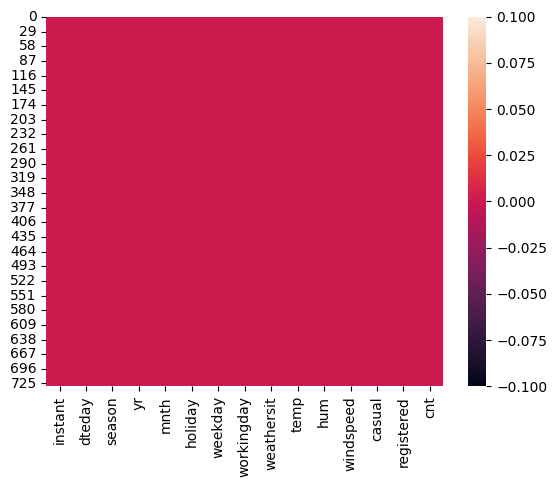

In [7]:
sns.heatmap(bike.isnull());

O heatmap está referenciando os valores nulos da base.
É possível ver o heatmap está completamente de uma cor, o que mostra que não há dados faltantes na base.
A base não possui dados nulos.

Existem colunas na base que não são significantes para o estudo. Por isso, elas serão retiradas da base.

In [8]:
bike = bike.drop(labels = ['instant'], axis = 1)

In [9]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


Retirando tb o 'casual' e 'registered' que não serão usados e sim o somatório dos dois.

In [10]:
bike = bike.drop(labels = ['casual', 'registered'], axis = 1)

In [11]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Será alterado o formato da coluna de data 'dteday' para um formato de data do pandas.

In [12]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [13]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Estabelecendo que o índice da base de dados será a data.

In [14]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [15]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


Como agora a data está com índice da base de dados, a coluna de 'dteday' não precisa existir.

In [16]:
bike = bike.drop(labels = ['dteday'], axis = 1)

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


**Visualização da Base de Dados**

Será visualizado a frequência por semana do atributo 'cnt', que é a somatórias dos atributos 'casual' e 'registered'.

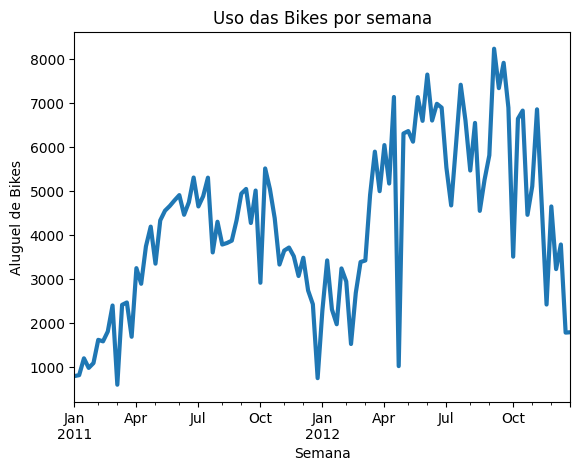

In [18]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Uso das Bikes por semana')
plt.xlabel('Semana')
plt.ylabel('Aluguel de Bikes');

É possível ver a freq. por semana, onde o eixo x é o atributo 'dteday', pois este atributo foi colocado com índice da base de dados. Por isso a freq. foi possível ver vista em função da data.

Agora será visualizada a freq. de aluguel de bikes por Mês.

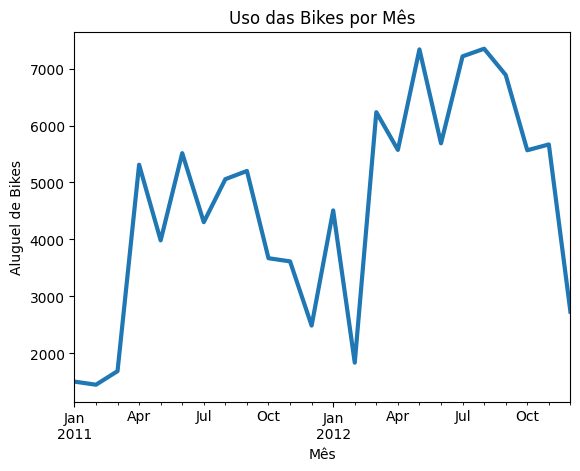

In [19]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Uso das Bikes por Mês')
plt.xlabel('Mês')
plt.ylabel('Aluguel de Bikes');

Agora será visualizada a freq. de aluguel de bikes por Quadrimestre.

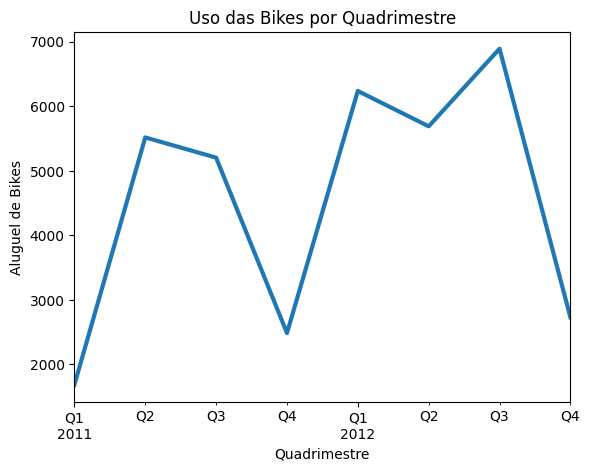

In [20]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Uso das Bikes por Quadrimestre')
plt.xlabel('Quadrimestre')
plt.ylabel('Aluguel de Bikes');

Agora serão mostrados gráficos onde ocorrem as combinações de atributos, mostrando a relação entre eles.

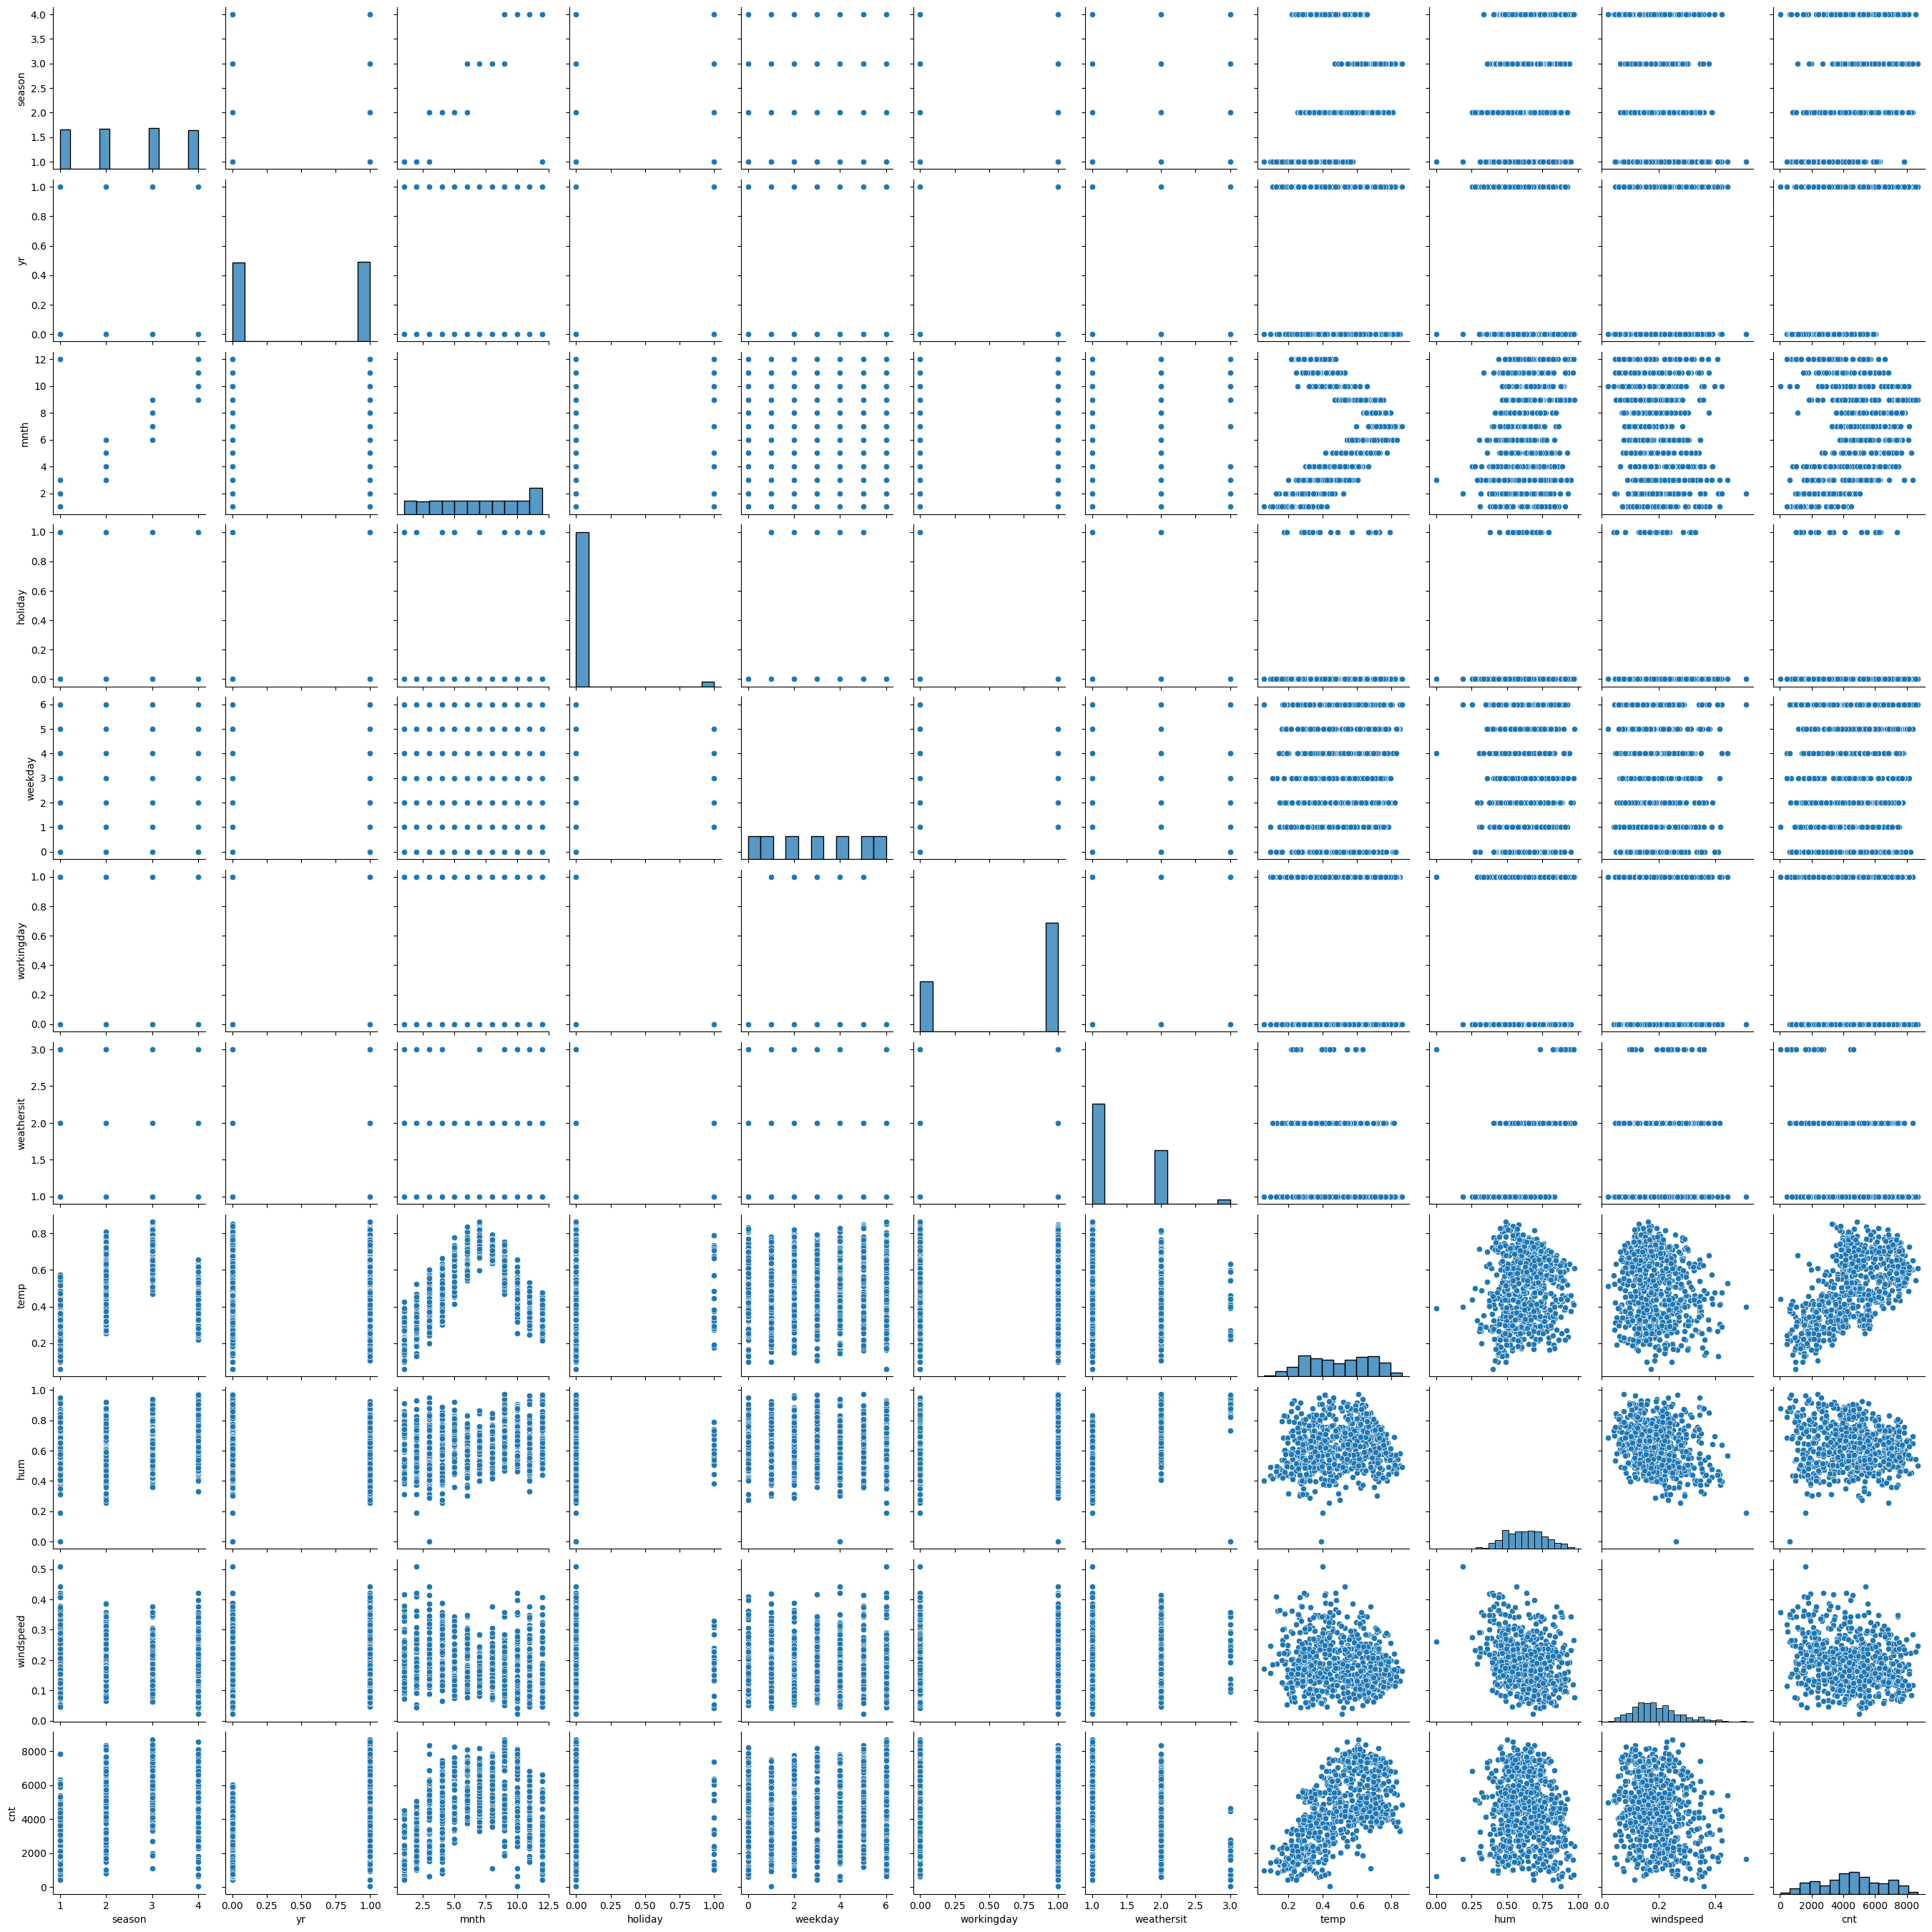

In [21]:
# A base de dados 'bike'
sns.pairplot(bike);

Agora será separado somente os atributos numéricos da base.

In [22]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [23]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


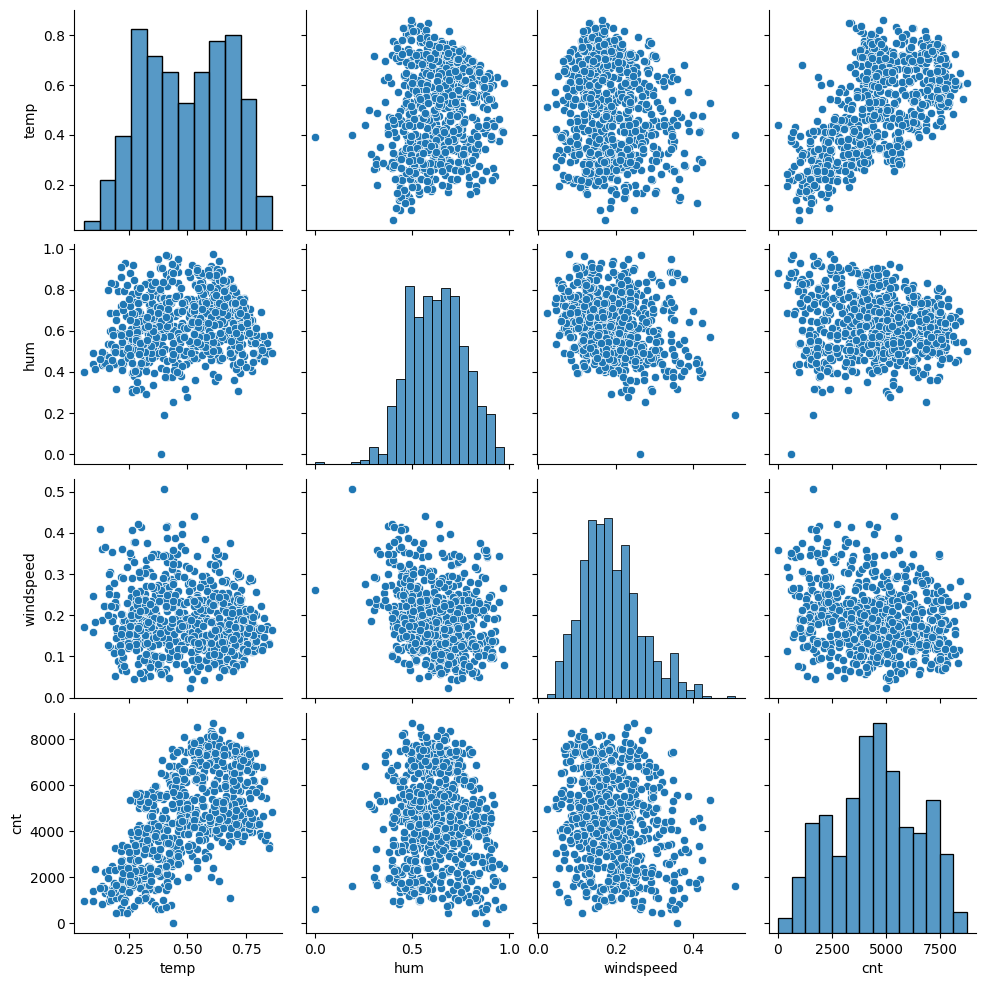

In [24]:
# A base de dados 'X_numerical'
sns.pairplot(X_numerical);

<Axes: >

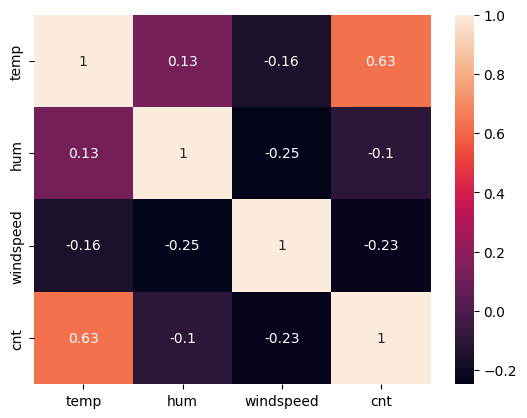

In [25]:
sns.heatmap(X_numerical.corr(), annot = True)
# o parâmetro 'annot' faz com que os número sejam mostrados

**Tratamento da Base Dados**

Separando as variáveis categóricas da base de dados.

In [26]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [27]:
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


Criando variáveis dummy para as variáveis categóricas para que o algorítmo não entenda que exista ordem de importância dentro do atributo.

Será usado o One-Hot Encoder

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [29]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [30]:
X_cat.shape

(731, 32)

Agora o X_cat está como uma matriz(array). É preciso passar o formato de dataframe.

In [31]:
X_cat = pd.DataFrame(X_cat)

In [32]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [33]:
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


Para fazer a previsão não é necessário o uso da data 'dteday'. Por isso o índice será retirado. A data como índice do dataframe foi usado somente para poder fazer os gráficos de visualização do comportamento de alugueis de bikes.

In [34]:
X_numerical = X_numerical.reset_index()

In [35]:
X_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


Agora serão unidos os dois dataframes

In [36]:
X_all = pd.concat([X_cat, X_numerical], axis = 1) # axis = 1 diz que a concatenação será com relação às colunas. Serão colocadas uma coluna ao lado da outra.

In [37]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


Apagando a coluna de data

In [38]:
X_all = X_all.drop(labels = ['dteday'], axis = 1)

In [39]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


Separando o dataframe entre PREDITORAS e TARGET

In [40]:
X = X_all.iloc[:, :-1].values # pegando todas as linhas e todas as colunas menos a última

In [41]:
y = X_all.iloc[:, -1:].values # pegando todas as linhas de somente a última coluna

In [42]:
X.shape

(731, 35)

In [43]:
y.shape

(731, 1)

Como os valores das variáveis estão em escalas diferentes, é preciso normalizar-los, pois assim um atributo não causará impacto maior no algoritmo só por causa de sua escala, nção significando ncessáriamente que ele tenha uma significância maior no algoritmo.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

A target 'y' é colocada em uma escala entre 0 e 1, pois desta forma o processamento da rede neural é mais rápido.

**Construção e Treinamento do Modelo**

Será separado os datasets de X e y em 80% pra treino e 20% para teste

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train.shape

(584, 35)

In [47]:
X_test.shape

(147, 35)

Começando a construir o modelo de rede neural para o treino

In [48]:
model = tf.keras.models.Sequential()
# 35 inputs -> número de atributos
# 100 neurônios na camada oculta

# 1a camada oculta
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (35,)))
# 2a camada oculta
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
# 3a camada oculta
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

# 1 camada de saída(output)
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23901 (93.36 KB)
Trainable params: 23901 (93.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

Treinando o modelo

In [51]:
# a base de treino tem 584 linhas
# os lotes(batchs) de treinammento serão divididos em ~12 com 50 linhas cada
# Será feita uma validação dos resultados dentro do próprio treinamento. Para a validação serão usados 20% do dataset de treino

epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split = 0.2)

Epoch 1/25
10/10 [==============================] - 2s 24ms/step - loss: 0.0840 - val_loss: 0.0326
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0263 - val_loss: 0.0198
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0163
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 5/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0121
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0100
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0098
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0066 - val_loss: 0.0110
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0108
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0092
Epoch 11/25
10/10 

**Avaliação do Modelo**

In [52]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

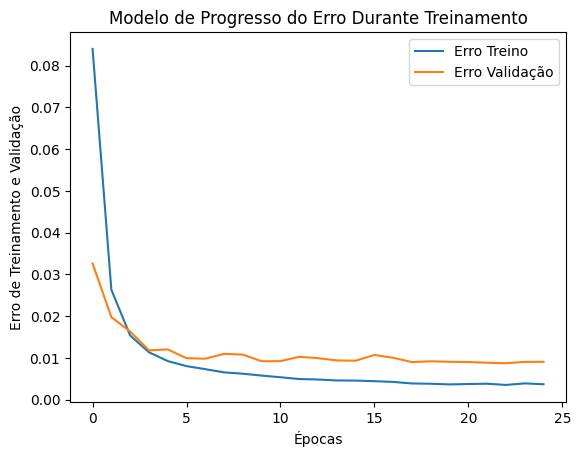

In [55]:
plt.plot(epochs_hist.history['loss'], label = 'Erro Treino')
plt.plot(epochs_hist.history['val_loss'], label = 'Erro Validação')
plt.title('Modelo de Progresso do Erro Durante Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Erro de Treinamento e Validação')
plt.legend();

Pelo gráfico é possível obs. a estabilização dos erros de treinemento e validação e avaliar que existe uma estabilização dos erros entre as épocas 10 e 15. Ou seja, os pesos estabelecidos pelo treinamento da rede permanecem praticamente os mesmos destas épocas em diante. Assim, não é necessário o treino por 25 épocas. Fazendo um treinamento de 15 épocas já seriam suficientes. Desta forma, é possível estabelecer um tempo menor de treino.

Fazendo a previsão com o modelo treinado a partir dos dados de teste (X_test)

In [56]:
y_predict = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [57]:
y_predict

array([[0.74330735],
       [0.7530789 ],
       [0.22179617],
       [0.6230205 ],
       [0.55071443],
       [0.5179513 ],
       [0.41621616],
       [0.2554339 ],
       [0.14367378],
       [0.88137925],
       [0.78984827],
       [0.57126516],
       [0.04297572],
       [0.76159906],
       [0.4499841 ],
       [0.43558997],
       [0.7721897 ],
       [0.9021707 ],
       [0.79046565],
       [0.53167486],
       [0.51423514],
       [0.13002202],
       [0.5526317 ],
       [0.38654107],
       [0.6094319 ],
       [0.9259479 ],
       [0.51641095],
       [0.16240504],
       [0.19384043],
       [0.4780763 ],
       [0.9026882 ],
       [0.1959334 ],
       [0.77955455],
       [0.42109317],
       [0.7275248 ],
       [0.43131846],
       [0.5747954 ],
       [0.60570127],
       [0.22807704],
       [0.32669038],
       [0.50621766],
       [0.39564496],
       [0.43978983],
       [0.79958624],
       [0.21329105],
       [0.9010555 ],
       [0.39452416],
       [0.777

Agora veremos a comparação dos valores PREDITOS pelo modelo com os valores REAIS

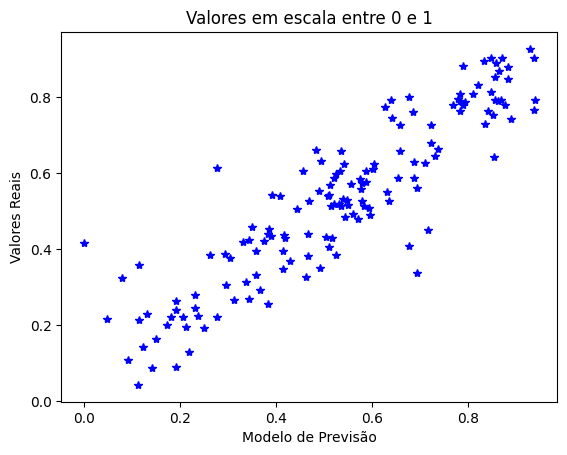

In [62]:
plt.plot(y_test, y_predict, "*", color = 'b')
plt.xlabel('Modelo de Previsão')
plt.ylabel('Valores Reais')
plt.title('Valores em escala entre 0 e 1');

Agora veremos os valores na escala original, pois os valores plotados no gráfico acima estão numa escala entre 0 e 1.

In [59]:
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)

In [60]:
y_predict_original

array([[6482.8276 ],
       [6567.7617 ],
       [1949.8523 ],
       [5437.2944 ],
       [4808.8096 ],
       [4524.0327 ],
       [3639.7507 ],
       [2242.2312 ],
       [1270.8125 ],
       [7682.948  ],
       [6887.361  ],
       [4987.4365 ],
       [ 395.54498],
       [6641.819  ],
       [3933.2617 ],
       [3808.148  ],
       [6733.8726 ],
       [7863.668  ],
       [6892.7275 ],
       [4643.318  ],
       [4491.732  ],
       [1152.1514 ],
       [4825.4746 ],
       [3381.815  ],
       [5319.182  ],
       [8070.339  ],
       [4510.644  ],
       [1433.6246 ],
       [1706.8611 ],
       [4177.439  ],
       [7868.166  ],
       [1725.0531 ],
       [6797.888  ],
       [3682.1416 ],
       [6345.6455 ],
       [3771.02   ],
       [5018.1216 ],
       [5286.7554 ],
       [2004.4457 ],
       [2861.5925 ],
       [4422.044  ],
       [3460.9458 ],
       [3844.653  ],
       [6972.0034 ],
       [1875.9258 ],
       [7853.9746 ],
       [3451.2039 ],
       [6778.

In [61]:
y_test_original

array([[5585.],
       [7421.],
       [1600.],
       [4717.],
       [5511.],
       [4541.],
       [  22.],
       [3348.],
       [1096.],
       [6883.],
       [7509.],
       [4844.],
       [1000.],
       [6824.],
       [6235.],
       [3403.],
       [5464.],
       [7580.],
       [5566.],
       [4708.],
       [5084.],
       [1927.],
       [4266.],
       [2566.],
       [5255.],
       [8090.],
       [4792.],
       [1321.],
       [2192.],
       [4985.],
       [7375.],
       [1865.],
       [7641.],
       [3272.],
       [7273.],
       [4401.],
       [5058.],
       [5115.],
       [1162.],
       [4036.],
       [3873.],
       [3126.],
       [3351.],
       [5905.],
       [1013.],
       [8167.],
       [3624.],
       [6691.],
       [ 705.],
       [2294.],
       [4475.],
       [2895.],
       [8156.],
       [5976.],
       [5020.],
       [3423.],
       [2028.],
       [5046.],
       [5740.],
       [4220.],
       [2744.],
       [6192.],
       [

Plotando o gráfico de comparação do PREDITO com o REAL para os valores em escala original

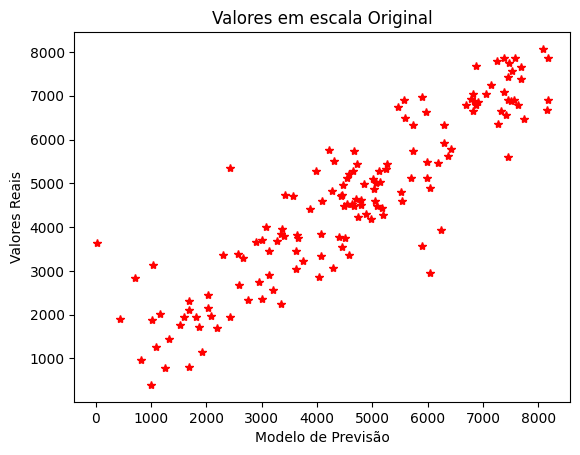

In [63]:
plt.plot(y_test_original, y_predict_original, "*", color = 'r')
plt.xlabel('Modelo de Previsão')
plt.ylabel('Valores Reais')
plt.title('Valores em escala Original');

Estabelecendo as métricas de Erros.
Será usado o R² Ajustado

In [65]:
# Número de Atributos
k = X_test.shape[1]
k

35

In [66]:
# Número de linhas(Registros)
n = len(X_test)
n

147

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [68]:
# mean absolute error
mae = mean_absolute_error(y_test_original, y_predict_original)
# mean squared error
mse = mean_squared_error(y_test_original, y_predict_original)
# root mean squared error
rmse = sqrt(mse)
# R²
r2 = r2_score(y_test_original, y_predict_original)
# R² Ajustado
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [69]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nR2 ADJ: ", adj_r2)

MAE:  644.2576277337107 
MSE:  782359.7390034902 
RMSE:  884.5110168920962 
R2:  0.8103022359095818 
R2 ADJ:  0.7504876256108013


Houve uma queda do R2 para R2 ADJ o que indica que existem atributos que não tem tanta relevância para a predição do modelo.
A ideia agora é usar o R2 ADJ como parâmetro pra ao retirar os atributos menos relevante através de seleção de características, será possível ver uma aumento do R2 ADJ